<a href="https://colab.research.google.com/github/tigarto/curso_2023-1/blob/main/variables_aleatorias_continuas/continua_exponencial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/estocasticos-udem/curso_2023-1/blob/main/variables_aleatorias_continuas/continua_exponencial.ipynb)

In [1]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

### Ejemplo 1

Sea $X = \text{la\;cantidad\;de\;tiempo\;(en\;minutos)\;que\;un\;empleado\;de\;correos\;pasa\;con\;su\;cliente}$. Se sabe que el tiempo tiene una distribución exponencial con un promedio de cuatro minutos.


Si se analiza este problema tenemos que: $\mu = 4$ de modo que:

$$\mu=\frac{1}{\lambda} \to \lambda=\frac{1}{\mu}=\frac{1}{4} = 0.25$$

De modo que lo quetenemos es que: $ X \sim Exp(\lambda = 0.25) $

In [3]:
# VA -> X: Tiempo de atencion que pasa un empleado de la oficina de correos atendiendo a un cliente (en minutos).

l = 0.25 # lambda
beta = 1/l # Beta = 1/lambda
X = stats.expon(scale = beta)

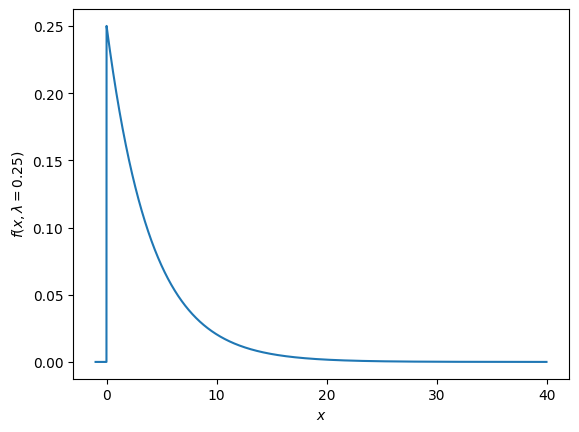

In [10]:
x = np.arange(-1,40,0.01)

# FDP - Funcion de densidad de probabilidad (f(x))
pdf = X.pdf(x)
plt.plot(x, pdf)
plt.xlabel('$x$')
plt.ylabel('$f(x,\lambda = 0.25)$')
plt.show()

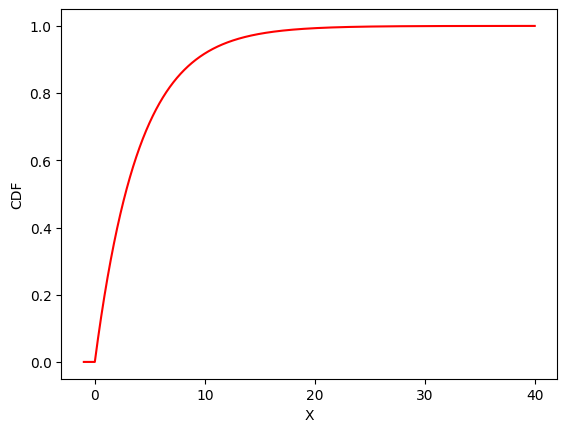

In [11]:
# CDF - Funcion de distribucion acumulativa (F(x))
plt.figure()
cdf = X.cdf(x)
plt.plot(x, cdf, color = 'r')
plt.xlabel('X')
plt.ylabel('CDF')
plt.show()


**Pregunta**: Halle la probabilidad de que un empleado pase de cuatro a cinco minutos con un cliente seleccionado al azar


$$P(4<X<5) = P(X<5) - P(X<4) = P(X \leq 5) - P(X \leq 4) $$

$$P(4<X<5)  = F(X=5) - F(X = 4)$$

In [12]:
P1 = X.cdf(5) - X.cdf(4)  # P(4 < X < 5) = F(5) - F(4)
print("P(4 < X < 5) =", P1)

P(4 < X < 5) = 0.08137464431125219


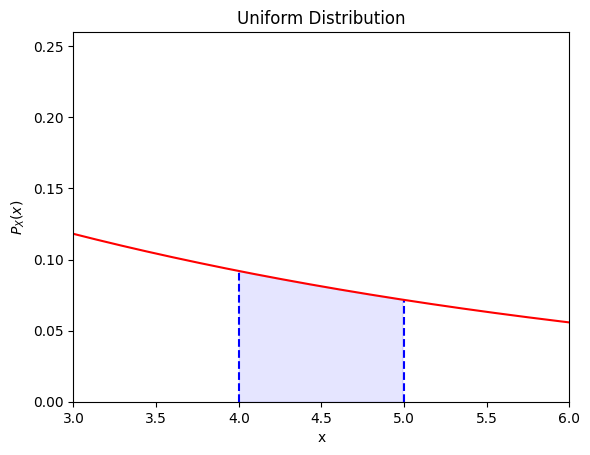

In [13]:
# Grafica
fig, ax = plt.subplots()
ax.set_xlim(3, 6)
ax.set_ylim(0, max(pdf) + 0.01)
# Limites
x_4 = plt.vlines(x = 4, ymin = 0,ymax = X.pdf(4), color = 'b', linestyles='--')
x_5 = plt.vlines(x = 5, ymin = 0,ymax = X.pdf(5), color = 'b', linestyles='--')
plt.title('Uniform Distribution')
plt.ylabel('$P_X(x)$')
plt.xlabel('x')
plt.plot(x, pdf,color='r')
ax.fill_between(x, pdf,0, where=(x>=4) & (x<=5), color='blue', alpha=.1)

plt.show()

**Pregunta**: $P(X \leq k) = 0.5$

In [14]:
x

array([-1.  , -0.99, -0.98, ..., 39.97, 39.98, 39.99])

In [16]:
F = X.cdf(x)
F

array([0.        , 0.        , 0.        , ..., 0.99995426, 0.99995437,
       0.99995449])

In [18]:
k = 0
for i in range(len(F)):
  if(F[i] >= 0.5):
    k = x[i]
    break

print(f"k = {k}")



k = 2.7800000000000034


## Ejemplo 2

En promedio, una determinada pieza de computadora dura diez años. El tiempo que dura la parte de la computadora se distribuye exponencialmente.
1. ¿Cuál es la probabilidad de que una pieza de computadora dure más de 7 años?
2. En promedio, ¿cuánto tiempo durarían cinco piezas de computadora si se utilizan una tras otra?
3. El ochenta por ciento de las piezas de las computadoras duran como máximo ¿cuánto tiempo?
4. ¿Cuál es la probabilidad de que una pieza de computadora dure entre nueve y 11 años?


Sea $Y = \text{Tiempo\;de\;duración\;de\;la\;pieza\;de\;computadora}$ de acuerdo al problema $Y \sim Exp(\lambda)$ donde podemos tener en cuenta que al darnos la media $\mu = 10$ podemos hallar $\lambda$ de la siguiente manera:

$$\mu = \frac{1}{\lambda} \to \lambda = \frac{1}{\mu} = \frac{1}{10} = 0.1$$

$$\lambda = \frac{1}{\beta} \to \beta = \frac{1}{\lambda} = \frac{1}{0.1} = 10$$

De modo que tendremos que $Y \sim Exp(\lambda = 0.1)$ o en terminos del parametro $\beta$ tenemos: $Y \sim Exp(\beta = 10)$

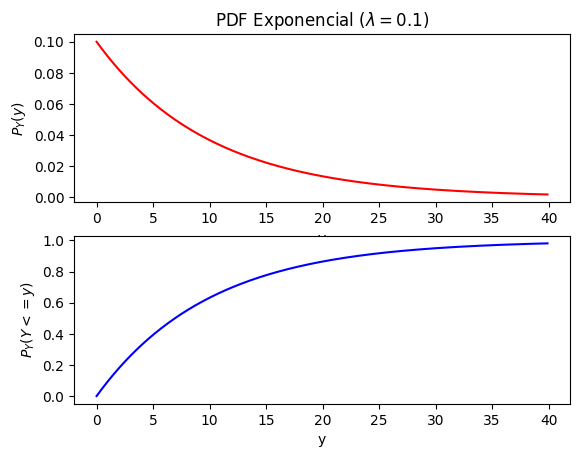

In [19]:
l = 0.1 # lambda
Y = stats.expon(scale = 1/l)

# VA -> Y: Tiempo de duración de la pieza de computadora

y = np.arange(0,40,0.1)

# FDP - Funcion de densidad de probabilidad (f(y))
pdf_y = Y.pdf(y)

# CDF - Funcion de densidad de acumulativa (F(y))
cdf_y = Y.cdf(y)

# Plot 1: FDP
plt.subplot(2, 1, 1)
plt.title('PDF Exponencial ($\lambda = 0.1$)')
plt.ylabel('$P_Y(y)$')
plt.xlabel('y')
plt.plot(y, pdf_y,color='r')

#Plot 2: CDF
plt.subplot(2, 1, 2)
plt.ylabel('$P_Y(Y<=y)$')
plt.xlabel('y')
plt.plot(y, cdf_y,color='b')
plt.show()


**Solución punto 1**

Nos piden: $P(Y>7)$ lo cual es:

$$P(Y > 7) = 1 - P(Y \leq 7) = 1 - F(Y = 7)$$

In [24]:
P_7 = 1 - Y.cdf(x = 7)
print(f"P(Y > 7) = 1 - {Y.cdf(x = 7):.4f} = {P_7:.4f}")

P(Y > 7) = 1 - 0.5034 = 0.4966


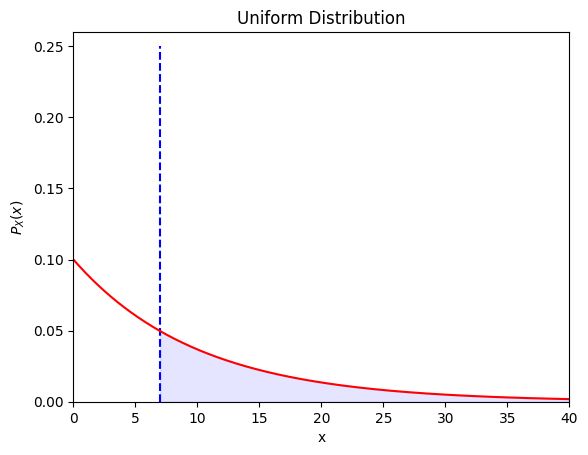

In [25]:
# Grafica
fig, ax = plt.subplots()
ax.set_xlim(0, 40)
ax.set_ylim(0, max(pdf) + 0.01)
# Limites
y_7 = plt.vlines(x = 7, ymin = 0,ymax = max(pdf), color = 'b', linestyles='--')
plt.title('Uniform Distribution')
plt.ylabel('$P_X(x)$')
plt.xlabel('x')
plt.plot(y, pdf_y,color='r')
ax.fill_between(y, pdf_y,0, where=(y>=7), color='blue', alpha=.1)

plt.show()

**Solución punto 2**

En promedio, una pieza de computadora dura diez años ($\mu=10$). Por lo tanto, cinco piezas de computadora, si se utilizan una tras otra, durarían, en promedio:

$$5 \cdot \mu = 5 \cdot 10 = 50\;\text{años}$$

**Solución punto 3**

Se pide $𝑃(Y < k)=0.8$


In [23]:
P = 0.8
diff_cdf_y = np.absolute(cdf_y - P)
index_P = np.where(diff_cdf_y == min(diff_cdf_y))
k = y[index_P[0][0]]
print("k = " + str(k))

k = 16.1


**Solución punto 4**

Se pide: $P(9 < Y < 11)$ 

$$P(Y > 7) = P(Y < 11) - P(Y < 9) = P(Y \leq 11) - P(Y \leq 9) = F(Y = 9) - F(Y = 7)$$

In [29]:
P9_11 = Y.cdf(11) - Y.cdf(9)
print(f"P(9 < Y < 11) = F(Y = 11) - F(Y = 9) = {Y.cdf(11):.4f} - {Y.cdf(9):.4f} = {P9_11:.4f}")


P(9 < Y < 11) = F(Y = 11) - F(Y = 9) = 0.6671 - 0.5934 = 0.0737


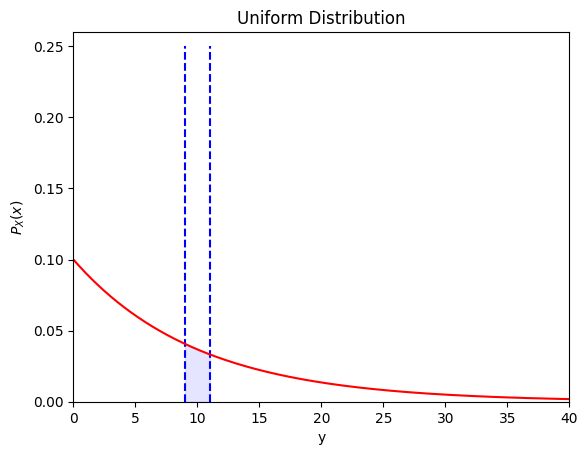

In [31]:
# Grafica
fig, ax = plt.subplots()
ax.set_xlim(0, 40)
ax.set_ylim(0, max(pdf) + 0.01)
# Limites
y_9 = plt.vlines(x = 9, ymin = 0,ymax = max(pdf), color = 'b', linestyles='--')
y_11 = plt.vlines(x = 11, ymin = 0,ymax = max(pdf), color = 'b', linestyles='--')
plt.title('Uniform Distribution')
plt.ylabel('$P_X(x)$')
plt.xlabel('y')
plt.plot(y, pdf_y,color='r')
ax.fill_between(y, pdf_y,0, where=(y>=9) & (y<=11), color='blue', alpha=.1)

plt.show()

### Ejemplo 3

Supongamos que la duración de una llamada telefónica, en minutos, es una variable aleatoria exponencial con parámetro de decaimiento 1∕12. 
1. Si otra persona llega a un teléfono público justo antes que usted, calcule la probabilidad de que tenga que esperar más de cinco minutos. 
2. Calcule la media, la varianza y la desviación estándar.

Tal y como se enuncia en el problema, la variable aleatoria es exponencial y se define como:
* $Z:\;\text{Duración\;de\;una\;llamada\;telefónica\;en\;minutos}$

La variable aleatoria $Z$ sigue una distribución de probabilidad exponencial con parametro de decaimiento $\lambda = \frac{1}{12}$, lo cual simbolicamente es: $Z \sim Exp(\lambda = \frac{1}{12})$.

In [ ]:
l = 1/12 # lambda
beta = 1/l

# VA -> Z: Duración de una llamada telefónica en minutos.
Z = stats.expon(scale = beta)

Teniendo en cuenta esto, vamos primero a graficar las funciones de densidad de probabilidad y de probabilidad acumulativa.

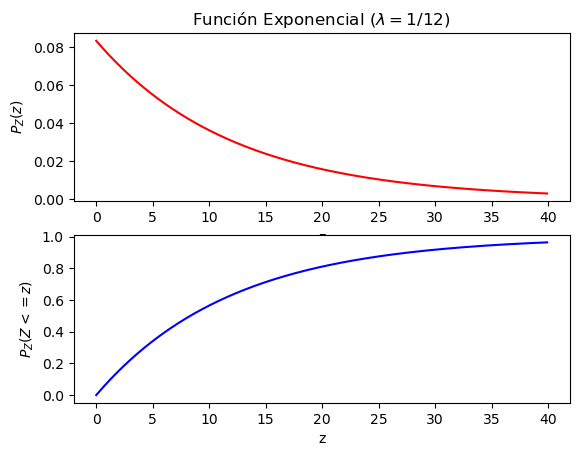

In [ ]:
z = np.arange(0,40,0.1)

# FDP - Funcion de densidad de probabilidad (f(y))
pdf_z = Z.pdf(z)

# CDF - Funcion de densidad de acumulativa (F(y))
cdf_z = Z.cdf(z)

# Plot 1: FDP
plt.subplot(2, 1, 1)
plt.title('Función Exponencial ($\lambda = 1/12$)')
plt.ylabel('$P_Z(z)$')
plt.xlabel('z')
plt.plot(z, pdf_z,color='r')

#Plot 2: CDF
plt.subplot(2, 1, 2)
plt.ylabel('$P_Z(Z<=z)$')
plt.xlabel('z')
plt.plot(z, cdf_z,color='b')
plt.show()


**Solución punto 1**

En este caso nos preguntan: $P(Z > 5)$

$$P(Z > 5) = 1 - P(Z \leq 5) = 1 - F_Z(Z=5)$$

In [ ]:
P_5 = 1 - Z.cdf(5) # P(Z > 5) = 1 - F(5)
print(f"P(Z > 5) = {P_5:.4f}")

P(Z > 5) = 0.6592


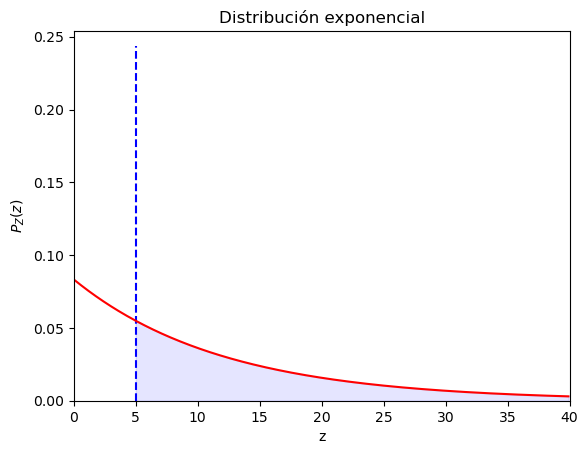

In [ ]:
# Grafica
fig, ax = plt.subplots()
ax.set_xlim(0, 40)
ax.set_ylim(0, max(pdf) + 0.01)
# Limites
z_5 = plt.vlines(x = 5, ymin = 0,ymax = max(pdf), color = 'b', linestyles='--')
plt.title('Distribución exponencial')
plt.ylabel('$P_Z(z)$')
plt.xlabel('z')
plt.plot(z, pdf_z,color='r')
ax.fill_between(z, pdf_z,0, where=(z>=5), color='blue', alpha=.1)

plt.show()

**Solución punto 2**

Los resultados de la media, la varianza y la desviación estandar son:

$$\mu = E(Z) = \frac{1}{\lambda}=\frac{\frac{1}{1}}{\frac{1}{12}}=12$$
$$\sigma^2 = Var(Z) = \frac{1}{\lambda^2}=\frac{1}{(\frac{1}{12})^2}=144$$
$$\sigma = sd(Z) = \frac{1}{\lambda}=\frac{\frac{1}{1}}{\frac{1}{12}}=12$$

In [ ]:
mu = Z.mean()
sigma = Z.var()
sd = Z.std()

print(f"Media: {mu:.4f}")
print(f"Varianza: {sigma:.4f}")
print(f"Desviación estandar: {sd:.4f}")

Media: 12.0000
Varianza: 144.0000
Desviación estandar: 12.0000
